## Unsupervised learning - PCA and clustering capstone project

## Exporting the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

from sklearn.impute import KNNImputer #You will need the scikit-learn version >= 0.22

from sklearn.decomposition import PCA #run again if it does not converge the first time
!pip install pca
from pca import pca

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# import scipy.cluster.hierarchy as shc

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Ignoring OMP thread count with k-means
import warnings
warnings.filterwarnings('ignore')

## Data Exportation

In [2]:
data = pd.read_csv('UsArrests.csv')
df = pd.read_csv('UsArrests.csv')
cities = data.index
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Understanding the Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Making numerical features to float types

data["Assault"] = data["Assault"].astype("float64")
data["UrbanPop"] = data["UrbanPop"].astype("float64")
data.dtypes

City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [5]:
# Checking for any missing values within the data set

print('Calculating any missing values contained in the DataFrame: \n' ,data.isnull().sum())

Calculating any missing values contained in the DataFrame: 
 City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [6]:
# Statistical summary

data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


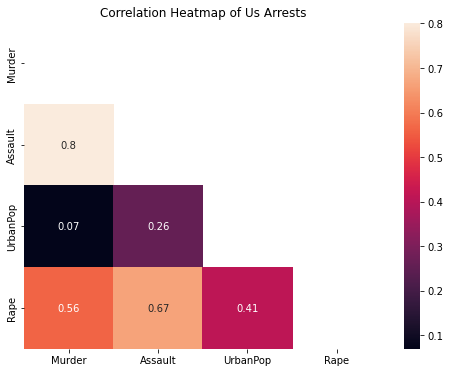

In [7]:
# Looking at how our datas' features correlate with one another

plt.figure(figsize=(8,6))
Arrest_corr = data.corr()

# to mask mirrored side of heatmap
dropmirror = np.zeros_like(Arrest_corr)
dropmirror[np.triu_indices_from(dropmirror)] = True

sns.heatmap(Arrest_corr, annot=True, mask=dropmirror)
plt.title('Correlation Heatmap of Us Arrests')
plt.show()


The graph avobe shows the correlation between the variables, where all of them have possitive correlation. Urbanpop and murder have the lowest positive correlation (0.7), and rape and assault have the higuest correlation (0.8).

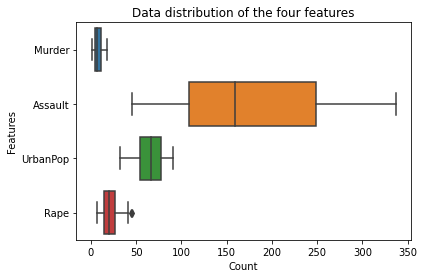

In [8]:
# Boxplot to represent the distribution

sns.boxplot(data=data, orient='h')
plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Data distribution of the four features')
plt.show()

As can be seen in the boxplot, assault is the crime that take pace the most, followed by rape and murder.

## Data Sacaling

In [9]:
# Select independent and standardize features

scaled = StandardScaler().fit_transform(data.iloc[:,1:5])

# Create scaled version of dataframe

data_scale = pd.DataFrame(scaled, columns = data.columns[1:5])
data_scale.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Selecting number of components for PCA

In [10]:
# How components attributes itself to the explained variance

pca = PCA().fit(data_scale)

pca.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

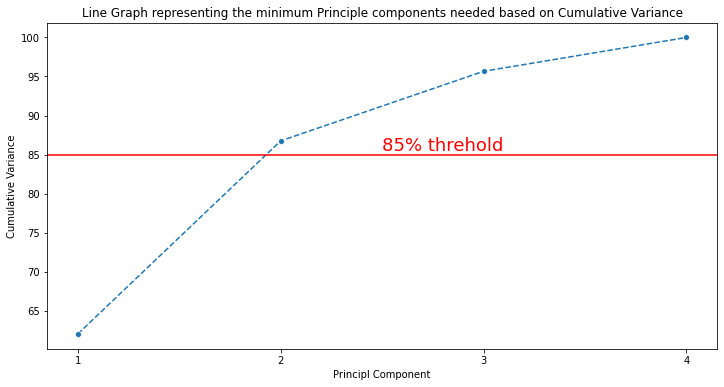

In [11]:
# Create a graph showing minimum components needed for our analysis

X = np.arange(1, 5, step=1)

plt.figure(figsize=(12,6))
sns.lineplot(x=X, y = np.cumsum(pca.explained_variance_ratio_)*100, linestyle='--', marker='o')

plt.title('Line Graph representing the minimum Principle components needed based on Cumulative Variance')
plt.xlabel('Principl Component')
plt.xticks(np.arange(1, 5, step=1))
plt.ylabel('Cumulative Variance')
plt.axhline(y=85, color='r', linestyle='-')
plt.text(2.5, 85.5, '85% threhold', color = 'red', fontsize=18)
plt.show()




The garph avobe shows that component 1 contains 62% of all explained variances of the data. Componente 2 contains 24.74%. Hence, these two componentes archive a explanation of variance within our data of 86.74%. This means that we got rid of 50% of our data, still able to maintain a 86.74% explanation value as to how our features deviate or affects one another.

Then, the analysis can be proceed with 2 components.

In [12]:
# Proceding with 2 components

pca = PCA(n_components = 2)

PC = pca.fit_transform(data_scale)

PC.shape

(50, 2)

In [13]:
# Transform the components into a pandas data frame

PC_data = pd.DataFrame(data = PC, columns = ['Principal Component 1', 'Principal Component 2'])

PC_data['City'] = data['City']

PC_data.head()

,Principal Component 1,Principal Component 2,City
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


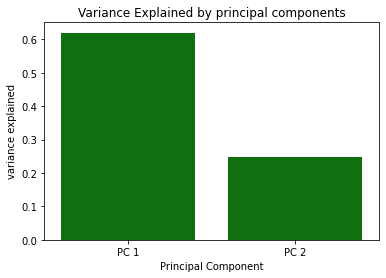

In [14]:
# Creating a barplot to visually represent how each component affects the variance

data = pd.DataFrame({'variance explained' : pca.explained_variance_ratio_, 'Principal Component' : ['PC 1', 'PC 2']})

plt.title('Variance Explained by principal components')
sns.barplot(x='Principal Component', y='variance explained', data=data, color='g')
plt.show()



This graph shows that PC 1 explains around 62% of the variance, and PC 2 explains around 24% of the variance, in total both PC1 and PC 2 explqins 86% of the variance.

In [15]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

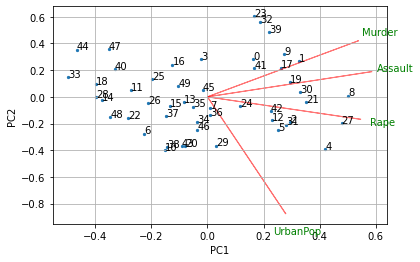

In [16]:
biplot(PC[:,0:2],np.transpose(pca.components_[0:2, :]),list(Arrest_corr),list(cities))
plt.show()

In this graph we can see that the sities are displayed as points. The vectors represent the four varisbles of our data: murder, assault, rape and urbanpopulation. All of the variables have a positive correlation with the first princial component. On the other hand, rape and urban population have a negative correlation with second principal variable.

## Hierarchical clustering

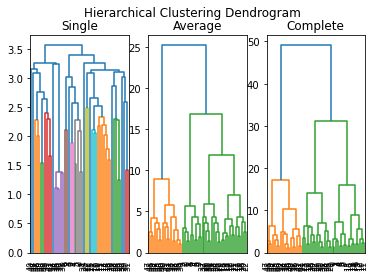

In [17]:
# Encode city variable

# PC_data_en = PC_data

PC_data['City'] = LabelEncoder().fit_transform(PC_data['City'])

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(PC_data)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(PC_data, method='single'), labels=PC_data.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(PC_data, method='average'), labels=PC_data.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(PC_data, method='complete'), labels=PC_data.index, ax=ax3)
plt.show()

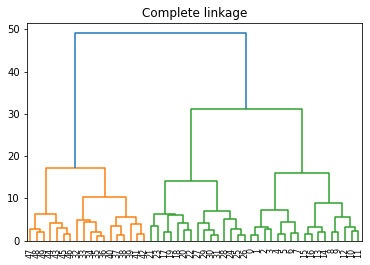

In [18]:
plt.title("Complete linkage")
dendrogram(linkage(PC_data, method='complete'), labels=PC_data.index)
plt.show()

Looking at the avobe cluster, we can see that the model identify two clusters. Also, it can be seen that the left cluster has more similarities between its observations than the right cluster.

In [19]:
# Select useful features
X = PC_data[['Principal Component 1','Principal Component 2']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 2

Data size:
(50, 2)


No handles with labels found to put in legend.


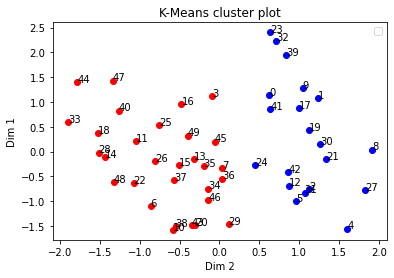

In [20]:
# We extract the first two components
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)

x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(PC)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

As can be seen in this cluster, the red group contains more states, which means that thouse contries contain similar caracteristics. This group would correspond to the left dendrogram cluster, that showed that that cluster contained more similaries than the other one.  